In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

# from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import samples_generator

from mpl_toolkits import mplot3d

In [12]:
def generate_s_curve(method, n = 1500):
    
    x, color = method(n_samples = n )
    
    print('Shape of X: ', x.shape)
    print('shape of color: ', color.shape)
    print()
    print('Sample X : \n')
    
    x =pd.DataFrame(x)
    print(x.sample(10))
    
    ax = plt.subplots(figsize = (12, 8))
    ax = plt.axes(projection = '3d')
    
    ax.scatter3D(x[0], x[1], x[2], c = color, s = 100, cmap = plt.cm.RdYlBu);
    
    return x, color

Shape of X:  (1500, 3)
shape of color:  (1500,)

Sample X : 

             0         1         2
1274 -0.416950  0.661576  1.908930
114  -0.716006  1.592912 -1.698094
397  -0.694921  1.236157  1.719086
1342  0.636898  1.025456 -1.770948
1172  0.997573  0.454079  1.069629
950  -0.996925  1.036664 -1.078360
612   0.695472  0.116198 -0.281447
253   0.703434  1.089707 -1.710760
755   0.982509  1.594229  1.186213
313   0.870315  0.087693  1.492496


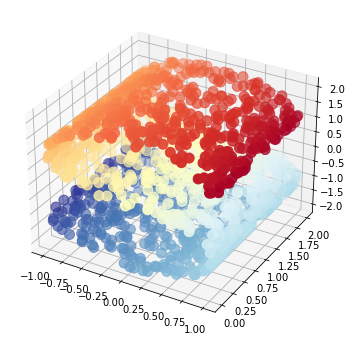

In [11]:
x, color = generate_s_curve(samples_generator.make_s_curve)

In [19]:
def apply_manifold_learning(x,method):
    
    x = method.fit_transform(x)
    
    print('New shape of x: ', x.shape)
    print()
    print('sample x: \n')
    
    x = pd.DataFrame(x)
    print(x.sample(10))
    
    plt.subplots(figsize = (12,8))
    plt.axis('equal')
    
    plt.scatter(x[0], x[1], cmap = plt.cm.RdYlBu, c = color)
    
    plt.xlabel('X[0]')
    plt.ylabel('X[1]')
    
    return method

New shape of x:  (1500, 2)

sample x: 

             0         1
829   0.228017 -0.305847
160  -0.052535 -0.387599
1367 -0.537439 -0.178859
817   0.216538 -0.511713
1233  0.594578 -0.501722
626  -0.054869  0.006004
43   -0.290507 -0.279903
1203  0.000392  0.388006
1360 -0.316735 -0.502947
9    -0.040072  0.444870


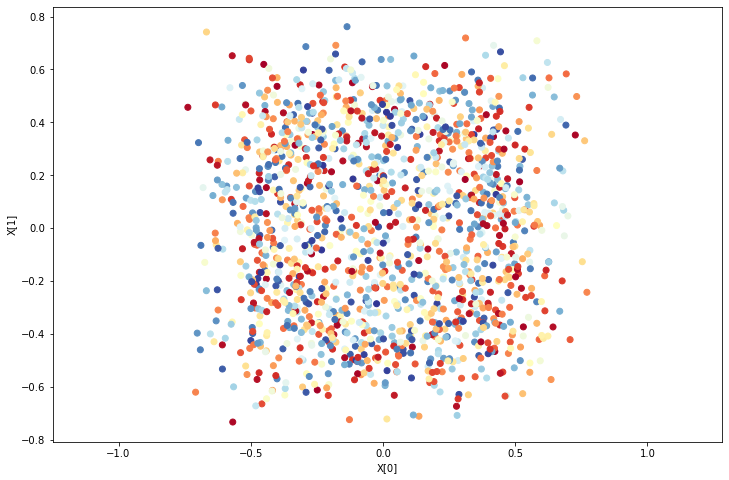

In [20]:
from sklearn.manifold import MDS

# Non parametric mds.... metric = false
mds = apply_manifold_learning(x, MDS(n_components = 2, metric = False))

New shape of x:  (1500, 2)

sample x: 

             0         1
726   0.356940  1.364768
685  -0.253572 -1.465648
1188 -1.632002 -1.137934
1229  1.713149  0.972518
971   1.859360 -0.102052
832   1.864682 -0.168392
731   2.128510  0.328951
26    1.916756  0.056466
1141 -0.759726 -1.427625
1125 -1.854443  0.157953


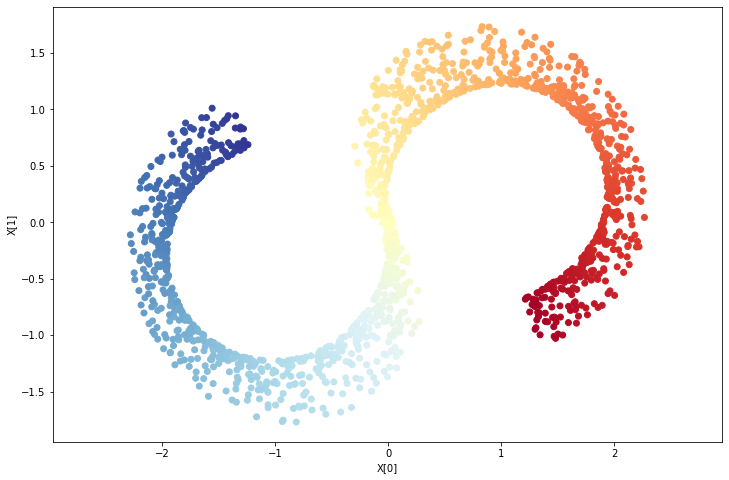

In [21]:
# Finds best fitting line.... metric = true
mds = apply_manifold_learning(x, MDS(n_components = 2, metric = True))

New shape of x:  (1500, 2)

sample x: 

             0         1
650   0.002220 -0.000180
1190 -0.002645 -0.001872
128   0.000682  0.002770
1142 -0.002198 -0.000398
111  -0.002727 -0.002212
419  -0.000903  0.002452
49   -0.001445  0.001554
1026 -0.001536  0.001376
1441  0.002936 -0.002607
1155 -0.000778  0.002626


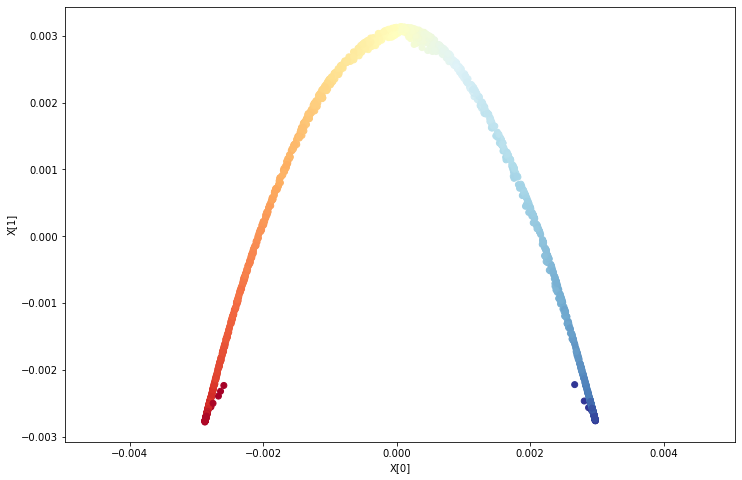

In [22]:
from sklearn.manifold import SpectralEmbedding

spectral_em = apply_manifold_learning(x, SpectralEmbedding(n_components = 2, 
                                                          random_state = 0,
                                                          eigen_solver = 'arpack')
                                     )

New shape of x:  (1500, 2)

sample x: 

              0          1
1284  67.941345  10.519654
142  -49.120350 -14.241354
714   72.985504  16.727396
546  -17.236275   9.542706
195   -2.965062   4.086763
1171  72.913200  17.527020
512   25.592577 -11.578506
93   -70.189285   1.471005
813   15.291220  -7.483677
1333 -31.894518 -10.428493


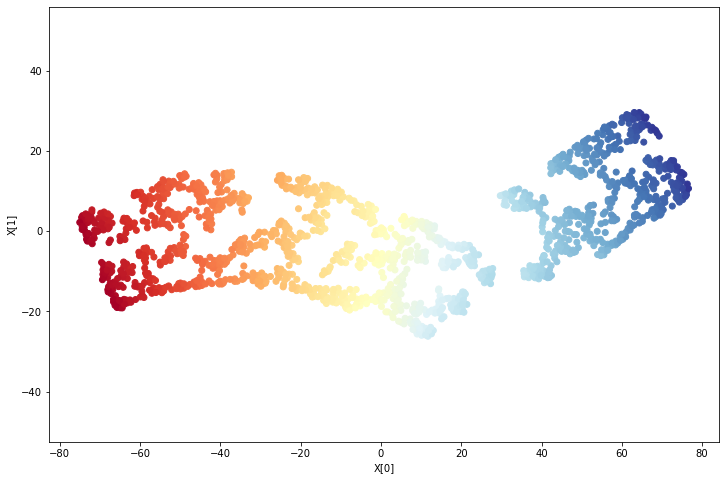

In [23]:
from sklearn.manifold import TSNE

tsne = apply_manifold_learning(x, TSNE(n_components = 2, init = 'pca', random_state = 0 ))

New shape of x:  (1500, 2)

sample x: 

             0         1
239  -3.871810  0.147928
1256 -3.588607 -0.912906
1003 -1.962901  0.017899
321   2.775845  0.280416
664   4.413908  0.114336
442   1.426652  0.291051
1139  0.895784  0.734883
1036  3.238943 -0.916095
817  -3.595376  0.426857
1178  3.856195 -0.348113


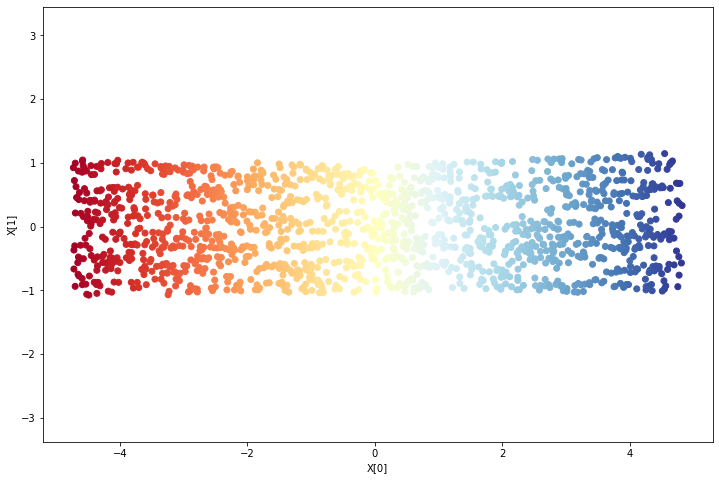

In [24]:
from sklearn.manifold import Isomap

isomap = apply_manifold_learning(x, Isomap(n_components = 2, n_neighbors = 15))

New shape of x:  (1500, 2)

sample x: 

             0         1
763  -0.000360 -0.032345
588  -0.036025  0.029262
103   0.011771 -0.026100
59   -0.024634  0.001113
34   -0.011439 -0.024057
216  -0.024743  0.001383
313  -0.039068  0.033897
661   0.021155 -0.007559
139  -0.024462  0.000300
1214  0.016137 -0.016184


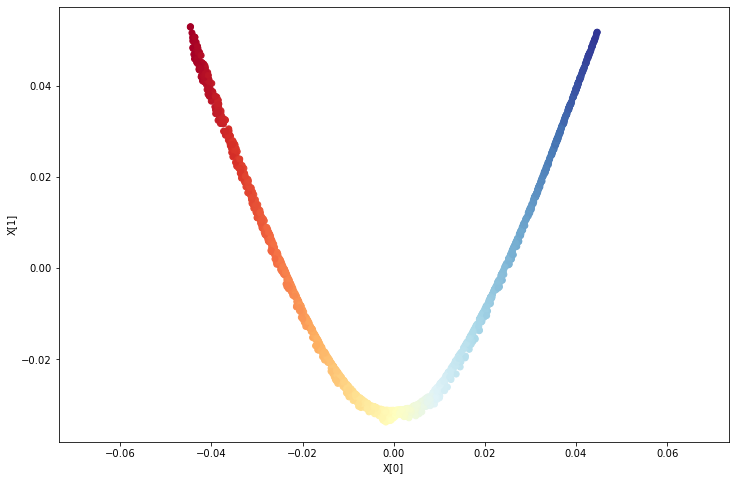

In [25]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(x,
                              LocallyLinearEmbedding(n_components = 2, n_neighbors = 15, method = 'standard')
                             )

New shape of x:  (1500, 2)

sample x: 

             0         1
1371  0.004272  0.006106
1404  0.032521 -0.020001
1424  0.017547 -0.035288
674  -0.028161  0.004598
1050 -0.023573  0.007331
1358 -0.023035 -0.037241
796   0.016349 -0.036847
93    0.039903  0.023075
351  -0.044443 -0.013672
769   0.035218 -0.009616


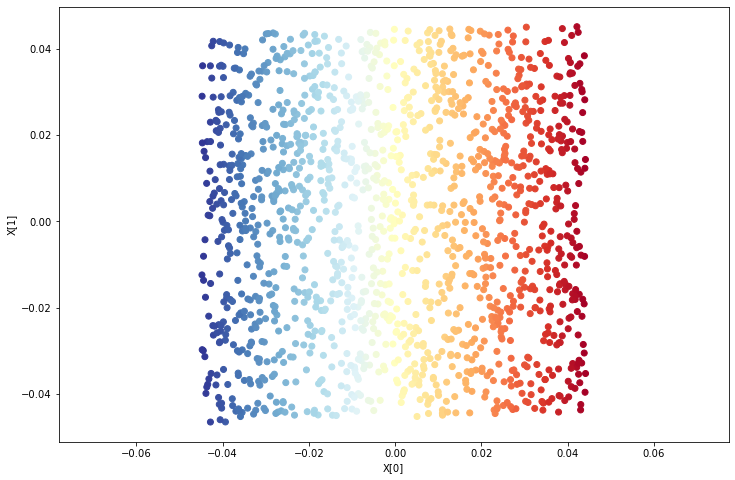

In [27]:
lle = apply_manifold_learning(x,
                              LocallyLinearEmbedding(n_components = 2, n_neighbors = 15, method = 'hessian')
                             )